# Model Visualization

This notebook demonstrates how to visualize the learning process of our TFA prediction models.

In [1]:
import sys
import os

# Add parent directory to path to import modules
sys.path.append(os.path.abspath('..'))

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

from models.MLP import MLP
from data_loader.Data import Data
from trainer.Trainer import Trainer
from utils.visualization import LearningVisualizer

## 1. Load Data and Create Model

In [2]:
# Create data loader
data = Data(batch_size=64)

# Create model - MLP with default architecture
model = MLP(input_size=3883, output_size=214)

xprs_path: /home/edson/Desktop/yang_lab/tfa-predictor/data/gene-xprs/processed/xprs-data.csv
tfa_path: /home/edson/Desktop/yang_lab/tfa-predictor/data/tfa/processed/tfa-labels.csv


## 2. Visualize Model Architecture

We'll use `torchviz` to visualize the model architecture.

In [3]:
try:
    from torchviz import make_dot
    
    # Get a sample batch
    batch = next(iter(data.train_dataloader()))
    x = batch[0]
    
    # Forward pass
    y = model(x)
    
    # Create visualization
    dot = make_dot(y, params=dict(model.named_parameters()))
    
    # Save and display
    dot.format = 'png'
    dot.render('model_architecture', cleanup=True)
    
    from IPython.display import Image
    Image('model_architecture.png')
except ImportError:
    print("Please install torchviz: pip install torchviz")
    print("Model Architecture: MLP with hidden sizes [1024, 512, 256]")

## 3. Train Model with Visualization

Epoch 1: Train Loss = 0.5633, Test Loss = 0.1415
Epoch 2: Train Loss = 0.3324, Test Loss = 0.0989
Epoch 3: Train Loss = 0.2744, Test Loss = 0.0769
Epoch 4: Train Loss = 0.2389, Test Loss = 0.0669
Epoch 5: Train Loss = 0.2161, Test Loss = 0.0598
Epoch 6: Train Loss = 0.1967, Test Loss = 0.0582
Epoch 7: Train Loss = 0.1824, Test Loss = 0.0545
Epoch 8: Train Loss = 0.1720, Test Loss = 0.0516
Epoch 9: Train Loss = 0.1588, Test Loss = 0.0479
Epoch 10: Train Loss = 0.1554, Test Loss = 0.0522
Epoch 11: Train Loss = 0.1504, Test Loss = 0.0429
Epoch 12: Train Loss = 0.1437, Test Loss = 0.0542
Epoch 13: Train Loss = 0.1398, Test Loss = 0.0423
Epoch 14: Train Loss = 0.1331, Test Loss = 0.0456
Epoch 15: Train Loss = 0.1321, Test Loss = 0.0439
Epoch 16: Train Loss = 0.1327, Test Loss = 0.0391
Epoch 17: Train Loss = 0.1217, Test Loss = 0.0377
Epoch 18: Train Loss = 0.1235, Test Loss = 0.0378
Epoch 19: Train Loss = 0.1237, Test Loss = 0.0371
Epoch 20: Train Loss = 0.1200, Test Loss = 0.0359
Epoch 21:

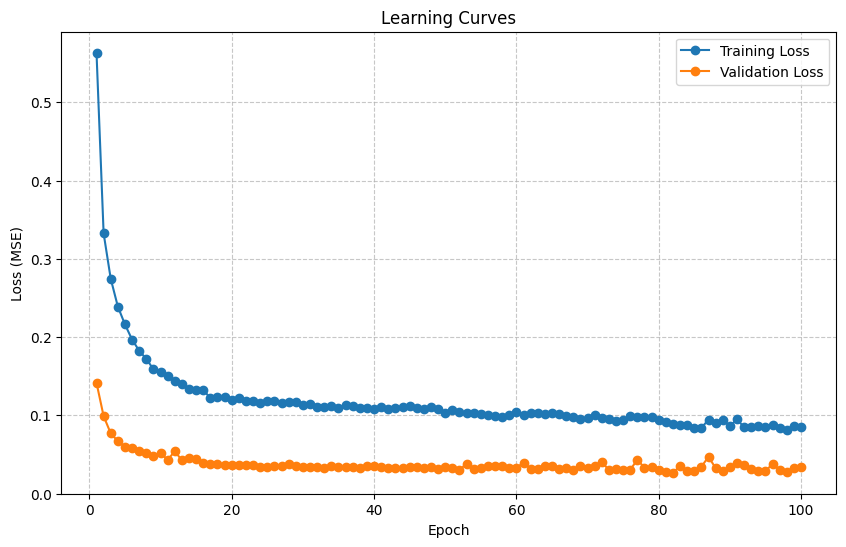

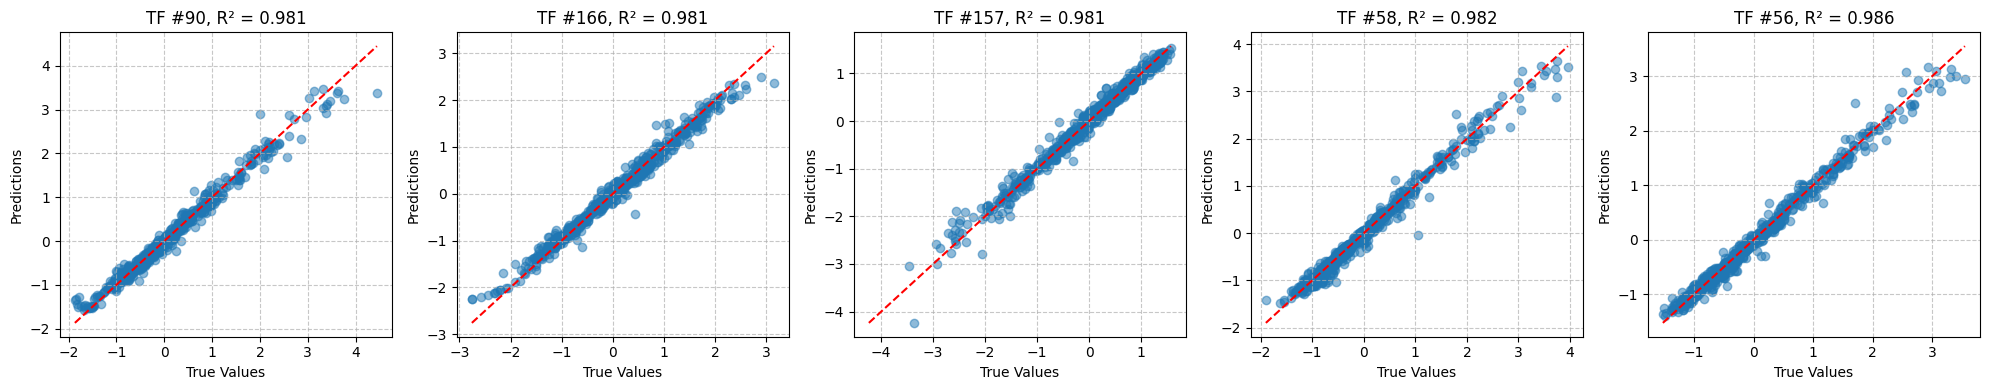

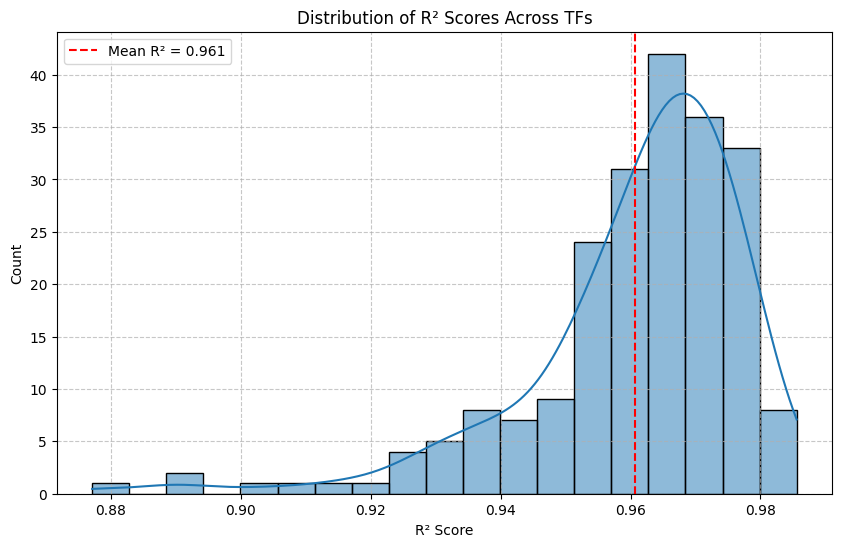

In [4]:
# Create trainer with visualization enabled
trainer = Trainer(max_epochs=100, visualize=True, save_plots=True, plots_dir='../plots')

# Train model
r2_scores = trainer.fit(model, data)

## 4. Manual Visualizations

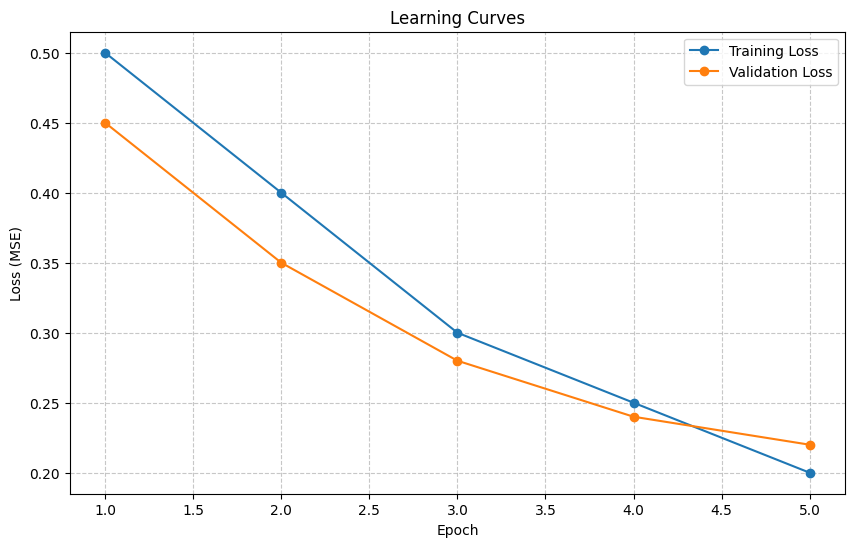

In [5]:
# Create a new visualizer
visualizer = LearningVisualizer()

# Let's assume we have these losses from training
example_train_losses = [0.5, 0.4, 0.3, 0.25, 0.2]
example_val_losses = [0.45, 0.35, 0.28, 0.24, 0.22]

# Update the visualizer
for i, (train_loss, val_loss) in enumerate(zip(example_train_losses, example_val_losses)):
    visualizer.update(i+1, train_loss, val_loss)

# Plot learning curve
visualizer.plot_learning_curve()

## 5. Save and Load Model

In [6]:
# Save model
model_save_path = '../models/trained_mlp.pth'
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# Load model
loaded_model = MLP(input_size=3883, output_size=214)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()
print("Model loaded successfully")

Model saved to ../models/trained_mlp.pth
Model loaded successfully
